## Additional Setup

Saving models in Keras requires the `h5py` module. This is not always included in all distributions.

You can try `pip install h5py` in your activated anvironment, but if you are using a Windows machine, you will most likely need to install a precompiled binary from [here](https://www.lfd.uci.edu/~gohlke/pythonlibs). Download the version of h5py that matches your python distribution cp35 or cp36, then choose `win32` for 32-bit or `win_amd64` for 64-bit (most likely) installs. Once the file is downloaded, start another shell (command window), activate your python 3 environment then use pip to install the downloaded wheel (.whl file) like the commented example below.

If the installation is successful, you should be able to import h5py without errors.

In [ ]:
#wget https://www.lfd.uci.edu/~gohlke/pythonlibs/h5py‑2.8.0rc1‑cp36‑cp36m‑win_amd64.whl
#pip install %USERPROFILE%/Downloads/h5py‑2.8.0rc1‑cp36‑cp36m‑win_amd64.whl
import h5py



## MultiLayer Perceptrons - Neural Networks

---

In this notebook, we train an MLP to classify images from the MNIST database.

### 1. Load MNIST Database

In [2]:
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

Using TensorFlow backend.


The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


### 2. Visualize the First Six Training Images

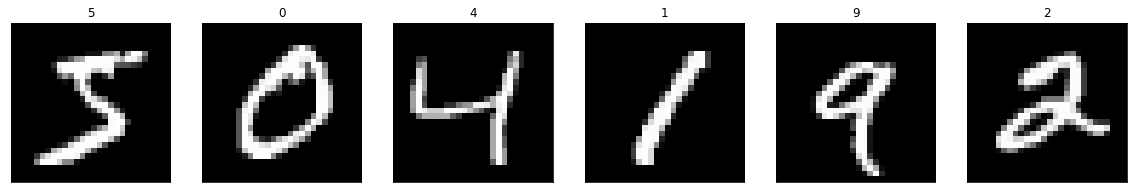

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### 3. View an Image in More Detail

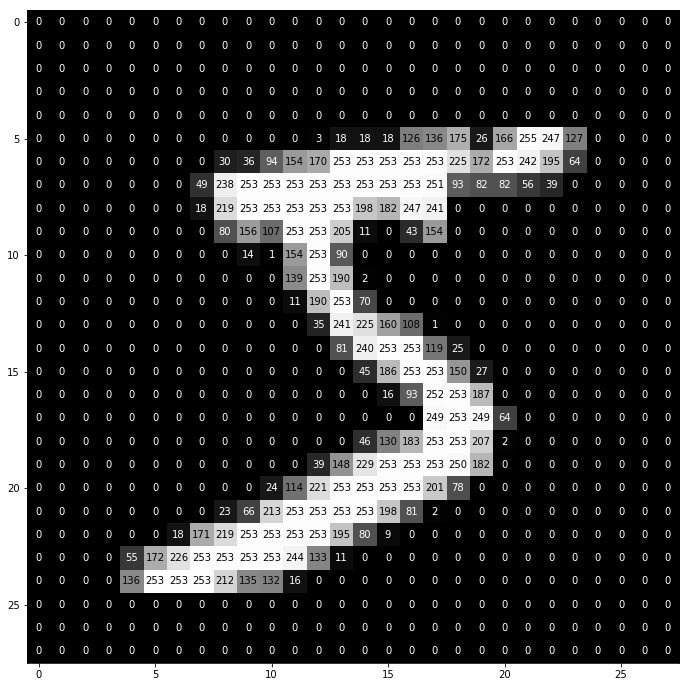

In [3]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

### 4. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [3]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

### 5. Encode Categorical Integer Labels Using a One-Hot Scheme

In [4]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### 6. Define the Model Architecture

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

### 7. Compile the Model

In [24]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

### 8. Calculate the Classification Accuracy on the Test Set (Before Training)

In [25]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 15.7500%


### 9. Train the Model

In [28]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='./models/mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s - loss: 0.1407 - acc: 0.9576 - val_loss: 0.1029 - val_acc: 0.9700
Epoch 2/10
48000/48000 [==============================] - 5s - loss: 0.1309 - acc: 0.9608 - val_loss: 0.1067 - val_acc: 0.9689
Epoch 3/10
48000/48000 [==============================] - 5s - loss: 0.1292 - acc: 0.9612 - val_loss: 0.1026 - val_acc: 0.9704
Epoch 4/10
48000/48000 [==============================] - 5s - loss: 0.1227 - acc: 0.9624 - val_loss: 0.1029 - val_acc: 0.9718
Epoch 5/10
48000/48000 [==============================] - 5s - loss: 0.1188 - acc: 0.9632 - val_loss: 0.1025 - val_acc: 0.9718
Epoch 6/10
48000/48000 [==============================] - 5s - loss: 0.1128 - acc: 0.9657 - val_loss: 0.1012 - val_acc: 0.9723
Epoch 7/10
48000/48000 [==============================] - 5s - loss: 0.1098 - acc: 0.9665 - val_loss: 0.0990 - val_acc: 0.9728
Epoch 8/10
48000/48000 [==============================] - 5s 

### 10. Load the Model with the Best Classification Accuracy on the Validation Set

In [29]:
# load the weights that yielded the best validation accuracy
model.load_weights('./models/mnist.model.best.hdf5')

### 11. Calculate the Classification Accuracy on the Test Set

In [30]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 97.2400%


## 12. Change the model architecture and repeat 

Change the model (*Section 6*) by changing the number of units in the hidden layer or adding another layer. You will have to re-run the cells up through the previous one to see how well you did.  See if you can find a better architecture


In [35]:
y_train.shape

(60000, 10)

In [48]:
tt = X_train[0,:]

In [51]:
np.sum(tt*X_train[2,:])

16.175179

In [6]:
list(y_train[0,:]).index(1)

5